<a href="https://colab.research.google.com/github/dolmani38/drift/blob/main/Concept%20drift%EC%97%90%20%EC%9D%98%ED%95%9C%20%EB%AA%A8%EB%8D%B8%EC%9D%98%20%EC%84%B1%EB%8A%A5%20%EC%B6%94%EC%A0%95%20%EB%B0%A9%EB%B2%95_1112.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Concept drift로 인한 모델 성능 저하의 정량적 추정 방법 <br>

Quantitative performance estimation method for model performance degradation due to concept drift

# 1. Introduction

*   기계학습은 Trainset에 의해 모델을 구축한 후, Testset을 사용하여 성능을 측정한다.
*   통상, 측정된 성능값은 해당 모델을 대변하는 성능 지표가 된다.
*   이렇게 구축된 모델은 live data (online data)를 입력해서 실 활용하게 되는데, 이때 초기에 측정한 성능을 지속하여 확보하고 있는지 운영 중에 성능을 실측하여 관리하기는 업무적으로 특수한 case 제외하고 매우 어렵다.
*   시계열 Regression의 경우, 예측 기간의 도래 이후, 실측 Y값을 알 수 있으나 역시 업무에 따라 그 시간 간격이 크게 발생 할 수 있으며, classification의 경우, 예측 class가 정확한지 실측하기 위해서는 live data에 대해 별도의 labeling 작업을 해야 한다.
*   이러한 이유로 실제 운영 중 모델 성능 관리가 간과되고 있으며, 이로 인해 경영상의 문제를 초래 할 수 있다.
*   이상의 이슈를 극복하기 위해, concept drift의 통계량을 측정하여 모델의 성능 상태를 유추하는 연구들이 이루어져 왔지만, concept drift의 측정값 (통계량)을 통해 직접적으로 성능을 예측하는 연구는 희박하다.
*   이번 연구에서는 concept drift의 측정값 (통계량)을 통해 직접적으로 precision 성능을 예측하는 성능 예측 모델(PPM, Performance prediction model)을 제안한다. 
* 이를 통해, 실제 비즈니스 환경에서 live data (online data)의 drift 상태를 통해 현재 모델의 성능을 정량적으로 추정하고 직관적인 모델 성능 관리가 이루어 질 수 있도록 한다.












# 2. 이론적 배경

* LaTex  :https://deep.chulgil.me/ibmunjareul-wihan-gico/ 
* https://www.cmor-faculty.rice.edu/~heinken/latex/symbols.pdf

* Trainset으로 모델을 학습한 이후, 시간이 경과하면, live data는 어떠한 사회, 문화, 환경적 요인에 의해 그 특성과 분포가 변화하게 된다.
* 이때문에 학습 시점의 모델 성능을 유지할 수 없게된다.
* 학습이후 이러한 현상은 Data Drift, Concept Drift로 설명할 수 있으나, 이를 학습시점의 상황으로 보면, Trainset과 Testset의 Distribution이 상이한 Covariate shift (Geeta Dharani. Y; Nimisha G Nair; Pallavi Satpathy; Jabez Christopher "Covariate Shift: A Review and Analysis on Classifiers", 2019 Global Conference for Advancement in Technology (GCAT))의 상황으로 설명할 수 있다.
* 따라서, Covariate Shift 상황의 학습 방법에 대한 연구들을 통해, 모델 성능 추정 방법을 도출하고자 한다.

* (https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.427.8969&rep=rep1&type=pdf)

* covariate shift의 문제에서 먼저, Trainset을 다음과 같이 정의한다.  
$$
X_L = \{x_1, . . . , x_m\}, Y_L = \{y_1, . . . , y_m\}
\tag{1}
$$
이때 x의 distribution, 즉 trainset의 distribution을 p(x|λ) 이라 한다.
* 이제, covariate shift 상황의 Testset을 다음과 같이 정의한다.
$$ 
X_T = \{x_{m+1}, . . . , x_{m+n}\}, Y_T = \{y_{m+1}, . . . , y_{m+n}\}
\tag{2}
$$
* 위의 testset의 distribution을 p(x|θ) 이라 한다.
* (Hidetoshi Shimodaira, "Improving predictive inference under covariate shift by weighting the log-likelihood function", Journal of Statistical Planning and Inference 90 (2000) 227–244)에 의하면 위의 조건에 대한 covariate shift의 학습은 아래의 식을 성립한다.

$$
E_{(x,y)\simθ}[l(f(x),y)] = E_{(x,y)\simλ}[\dfrac{p(x|θ)}{p(x|λ)} l(f(x),y)]
\tag{3}
$$
* 식(3)에서 l(f(x),y)은 모델 f(x)의 loss function을 의미한다.
* 식(3)은 loss 의 scale조정에 의해 covariate shift을 보정할 수 있는 관계식이다.
* 식(3)을 Drift 상황으로 일반화 해서 성능 관계식으로 바꾼다.  
* f(x)를 일반적인 수치예측 (regression)이라 가정하면
$$
l_{squared}(f(x),y) = (y − f(x))^2
\tag{4}
$$
* 식(3)에 식(4)를 대입하여 정리하면,
$$
E_{(x,y)\simθ}[(y − f(x))^2] = E_{(x,y)\simλ}[\dfrac{p(x|θ)}{p(x|λ)}(y − f(x))^2]
\tag{5}
$$
* 여기서 Expactaion의 연산 정리(https://blog.naver.com/mykepzzang/220837877074)에 의해 E(XY)=E(X)E(Y)를 대입하여
$$
E_{(x,y)\simθ}[(y − f(x))^2] = E_{(x,y)\simλ}[\dfrac{p(x|θ)}{p(x|λ)}]E_{(x,y)\simλ}[(y − f(x))^2]
\tag{6}
$$
와 같이 나타낼 수 있으며,
$$
E_{(x,y)\simθ}[(y − f(x))^2] = Testset의 MSE(Mean Square Error)
$$
이고
$$
E_{(x,y)\simλ}[(y − f(x))^2] = Trainset의 MSE(Mean Square Error)
$$
이기 때문에, 
* 식(6)을 정리하면,
$$
MSE_{testset} = E_{(x,y)\simλ}[\dfrac{p(x|θ)}{p(x|λ)}]MSE_{trainset}  
\tag{7}
$$ 
* 식(7)을 통해, testset(live data)의 성능은 trainset의 성능(최초 측정 성능)과 trainset, testset의 distribution의 관계식이 성립함을 알 수 있다.


# 3. Proposed Method

## pseudo code

--------------------------------------------------------------------------------
**Step1 : performance modeling**

--------------------------------------------------------------------------------
&nbsp;&nbsp;1:&nbsp;&nbsp;$L_{trainset} =  \{ Y_L, X_L\} $ #이하 간략히 $L$ 로 표기 <br>

&nbsp;&nbsp;2:&nbsp;&nbsp;$L_{testset} =  \{ Y_T, X_T\} $<br>
&nbsp;&nbsp;3:&nbsp;&nbsp;$f(x,L) = train(Y_L, X_L)$ <br>
&nbsp;&nbsp;4:&nbsp;&nbsp;$base\_score = score(f(X_T,L),Y_T)$<br>
&nbsp;&nbsp;5:&nbsp;&nbsp;$For$ number_of_sample $do $<br>
&nbsp;&nbsp;6:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$Y_b, X_b = block\_sampling(Y_L, X_L, sampling\_ratio)$<br>
&nbsp;&nbsp;7:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$X_b = noise\_injection(X_b,noise\_intensity)$<br>
&nbsp;&nbsp;8:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$drift = adjusted\_ks\_test(X_L, X_b)$<br>
&nbsp;&nbsp;9:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$\Delta score\_array \leftarrow (base\_score - score(f(X_b,L),Y_b))$<br>
10:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$drift\_array \leftarrow drift$ <br>
11:&nbsp;&nbsp;$end$ <br>
12:&nbsp;&nbsp;$ppm(d) = train(\Delta score\_array, drift\_array)$

--------------------------------------------------------------------------------
**Step2 : adjust scale**

--------------------------------------------------------------------------------

1:&nbsp;&nbsp;$For$ number_of_sample $do$<br>
2:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$Y_b, X_b = block\_sampling(Y_T, X_T, sampling\_ratio)$<br>
3:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$drift = adjusted\_ks\_test(X_L, X_b)$<br>
4:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$\Delta score\_array_{predicted} \leftarrow ppm(drift)$<br>
5:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$\Delta score\_array_{real} \leftarrow (base\_score - score(f(X_b,L),Y_b))$<br>
6:&nbsp;&nbsp;$end$<br>
7:&nbsp;&nbsp;$adjusted\_scale = \dfrac{var(\Delta score\_array_{real})}{var(\Delta score\_array_{predicted})}$

--------------------------------------------------------------------------------
**Step3 : apply perfomance_model**

--------------------------------------------------------------------------------

1:&nbsp;&nbsp;$l_{Input\_live\_data} =\{ X_l\}$ # live data에는 Y가 존재하지 않는다.<br>
2:&nbsp;&nbsp;$drift = adjusted\_ks\_test(X_L, X_l)$ <br>
3:&nbsp;&nbsp;$score_{predicted} = base\_score - adjusted\_scale * ppm(drift)$

* block sampling 에 대하서는 https://github.com/dolmani38/drift/blob/main/drift_sampling_0813.ipynb 참고!

## 설명

성능 예측 대상의 모델을 $f(x,L)$이라 할 때,

trainset과 testset은 $f(x,L)$의 학습 및 성능 측정을 위해 활용된 데이터에 해당.<br>
testset을 통하여 $f(x,L)$의 성능, base_score이 측정되었다.

<b>Step1 : 성능 모델링 단계</b> <br>
1. trainset에 대하여 random size로 블럭 샘플링 (block sampling)을 한다.
2. 샘플링된 $X_b$의 일부에 Noise를 주입하여 drift를 유도한다.
3. trainset($X_L$)과 drift유도된 Sample($X_b$)에 대해 변경된 Kolmogorov–Smirnov test를 하여, drift 통계량(Kolmogorov–Smirnov statistic)을 취득한다.
4. 이때, 변경된 KS Test는 기존의 KS Test의 식(8)에서 식(9)와 같이 변경하여 적용한다.

$$
\begin{align}
D_n = {sup}_x |F_n(x) - F(x)|
\tag{8}
\end{align}
$$

$$
\begin{align}
D_n = {sup}_x (F_n(x) - F(x))
\tag{9}
\end{align}
$$

5. 식(9)와 같이 절대값를 제거하므로 성능에 대한 drift 통계량의 설명력을 높인다.
6. drift유도된 Sample에 대하여 $f(x,L)$의 성능편차($\Delta score$)를 $\Delta score\_array$에 저장한다.
7. drift통계량을 $drift\_array$에 저장한다.
8. 1~7까지의 과정을 반복하여 drift에 대한 성능 편차 dataset를 생성한다.
9. drift에 대한 성능 편차 dataset을 통해, $ppm(d)$ 을 학습한다.


<b>Step2 : scale 조정 단계 </b><br>
Step1에서 $X_b$의 일부를 임의 치환하여 drift를 유도하였으므로 drift에 의한 성능 편차($\Delta score$)는 실제 drift에서 발생하는 편차와 scale이 다를 수 있다. 이를 조정하기 위해 testset을 통해, 그 Scale을 측정한다.
1. testset($Y_T,X_T$)에 대하여 random size로 블럭 샘플링(block sampling)을 한다.
2. trainset과 testset에서 추출된 Sample에 대해 변경된 Kolmogorov–Smirnov test를 하여, drift 통계량을 취득한다.
3. Step1에서 학습된 $ppm(d)$을 통해, 예측 성능 편차($\Delta score_{predicted}$)를 구하여 $\Delta score\_array_{predicted}$에  저장한다.
4. testset에서 추출된 Sample($Y_b,X_b$)에 대해 $f(x,L)$의 실 성능 편차($\Delta score_{real}$)를 구하여 $\Delta score\_array_{real}$에 저장한다.
5. 1~4의 과정을 반복하여 예측 성능 편차 dataset과 실 성능 편차 dataset을 생성한다.
6. 예측 성능 편차 dataset과 실 성능 편차 dataset의 분산을 비교하여 보정 Scale 값을 구한다.

<b>Step3 : $ppm(d)$의 적용 단계</b><br>
1. 일정기간 축적한 실 dataset ($X_l$)를 취득한다.
2. trainset($X_L$)과 실 dataset ($X_l$)에 대해 변경된 Kolmogorov–Smirnov test를 하여, drift통계량을 취득한다.
3. $ppm(d)$을 통해 예측 성능 편차($\Delta score _{predicted}$)를 구하고 보정 Scale 값을 곱한 후 base_score 에서 빼서 예측 성능값($score_{predicted}$)을 구한다. 


# 4. 실험 계획

*   Data
1. Personal Loan Data
> 미국의 개인 대출 기업 ‘Lending Club’의 공개 데이터 사용<BR>
> 2007~2017년까지 총 2,260,701건의 데이터, 대출 건당 실제 ‘default’ 여부 포함
151개 Column<BR>
> 데이터 정제 후, 81개 Features, 120만건 사용<BR>
>> trainset : 11,497건 (2010년)<BR>
>> online dataset : 1,268,183건 (2011~2017년)<BR>

2. Credit Card Transaction Data
> This data has more than 20 million transactions generated from a multi-agent virtual world simulation performed by IBM. 
> The data covers 2000 (synthetic) consumers resident in the United States, but who travel the world. 
> The data also covers decades of purchases, and includes multiple cards from many of the consumers. 
>> trainset : 37,301건 (2007년, 1/30 축소)<BR>
>> online dataset : 90,836건 (2008~2009년, 1/30 축소)<BR>

* 예측 알고리즘
> Random-forest for Personal Loan Data<BR>
> Catboost for Credit Card Transaction Data

* 성능 예측 알고리즘
> Ordinary Least Squares regression

* 실험의 변수
> feature_count (order of importance)<br>
> sampling_ratio (size) = 0.05 ~ 0.95, 0.20 ~ 0.80, 0.40 ~ 0.60<BR>
> stdev_ratio = 1, 2, 3<BR>

* 측정 지표
> 예측 알고리즘의 성능 지표 : precision<BR>
> PPM의 성능 지표<BR>
    >>mean_absolute_error<br>
    >>root_mean_square_error<br>
    >>mean_absolute_percentage_error<br>
    >>R_square<br>


# 5. 실험을 위한 기본 준비 

In [1]:
if True:
    from google.colab import drive
    drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import random
np.random.seed(1337)

In [3]:
def seed_everything(seed: int = 46):
    random.seed(seed)
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    tf.random.set_seed(seed)
    

# 7. loan predict 실험

## 데이터 구축

In [5]:
df_accepted = pd.read_csv("/content/drive/MyDrive/Drift/accepted_2007_to_2018Q4.csv")

print(df_accepted.shape)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(2260701, 151)


### 데이터 정제

In [6]:
# for the sake of simplicity, let's consider only Fully Paid and Charged Off values:

df_accepted = df_accepted[df_accepted.loan_status.isin(['Fully Paid', 'Charged Off'])]

print(df_accepted.shape)

(1345310, 151)


In [7]:
cols_to_drop = df_accepted.isnull().sum().sort_values(ascending=False).head(50).index
df_accepted = df_accepted.drop(columns=cols_to_drop)
df_accepted.shape

(1345310, 101)

In [8]:
# maybe we can go further, and eliminate columns up to title:

cols_to_drop = df_accepted.isnull().sum().sort_values(ascending=False).head(45).index
df_accepted = df_accepted.drop(columns=cols_to_drop)
df_accepted.shape

(1345310, 56)

In [9]:
# Remaining columns have missing data points, but they account for less than 0.2% of the total data. Let's remove the rows that are missing those values in those columns with dropna():

df_accepted = df_accepted.dropna()
df_accepted.shape

(1341026, 56)

In [10]:
# These are constant columns. We can drop it either.

cols_to_drop = ['out_prncp', 'out_prncp_inv', 'policy_code']
df_accepted = df_accepted.drop(columns=cols_to_drop)
df_accepted.shape

(1341026, 53)

In [11]:
# It seems we have many "duplicated" information. Let's drop some columns, based on visual inspection at corr_pairs dataframe:

cols_to_drop = ['fico_range_low', 'funded_amnt_inv', 'funded_amnt', 'total_pymnt_inv', 'total_pymnt', 'installment', 'collection_recovery_fee', 'total_rec_prncp', 'last_fico_range_low']
df_accepted = df_accepted.drop(columns=cols_to_drop)
df_accepted.shape

(1341026, 44)

In [12]:
values = df_accepted.loan_status.unique()
encode = [1,0]
d = dict(zip(values, encode))

df_accepted['loan_paid'] = df_accepted['loan_status'].map(d)

df_accepted = df_accepted.drop(columns=['loan_status'])


In [13]:
df_accepted

,id,loan_amnt,term,int_rate,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag,loan_paid
0,68407277,3600.0,36 months,13.99,C,C4,MORTGAGE,55000.0,Not Verified,Dec-2015,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,1
1,68355089,24700.0,36 months,11.99,C,C1,MORTGAGE,65000.0,Not Verified,Dec-2015,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,1
2,68341763,20000.0,60 months,10.78,B,B4,MORTGAGE,63000.0,Not Verified,Dec-2015,...,Joint App,0.0,0.0,0.0,0.0,0.0,N,Cash,N,1
4,68476807,10400.0,60 months,22.45,F,F1,MORTGAGE,104433.0,Source Verified,Dec-2015,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,1
5,68426831,11950.0,36 months,13.44,C,C3,RENT,34000.0,Source Verified,Dec-2015,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260688,89905081,18000.0,60 months,9.49,B,B2,OWN,130000.0,Not Verified,Oct-2016,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,1
2260690,88948836,29400.0,60 months,13.99,C,C3,MORTGAGE,180792.0,Not Verified,Oct-2016,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,1
2260691,89996426,32000.0,60 months,14.49,C,C4,MORTGAGE,157000.0,Source Verified,Oct-2016,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,0
2260692,90006534,16000.0,60 months,12.79,C,C1,RENT,150000.0,Not Verified,Oct-2016,...,Individual,0.0,0.0,0.0,3.0,0.0,N,Cash,N,1


In [14]:
# droping constant columns

print(df_accepted.pymnt_plan.value_counts())
print(df_accepted.hardship_flag.value_counts())

cols_to_drop = ['id', 'pymnt_plan', 'hardship_flag']
df_accepted = df_accepted.drop(columns=cols_to_drop)
df_accepted.shape

n    1341026
Name: pymnt_plan, dtype: int64
N    1341026
Name: hardship_flag, dtype: int64


(1341026, 41)

In [15]:
cat_cols = df_accepted.select_dtypes(include=['object']).columns
print(cat_cols)

print(df_accepted.term.value_counts())

# convert term into either a 36 or 60 integer numeric data type

l1 = df_accepted.term.unique()
l2 = [36, 60]
d = dict(zip(l1, l2))

df_accepted['term'] = df_accepted['term'].map(d)

# as grade is part of sub_grade, so let's just drop the grade feature.

df_accepted = df_accepted.drop(columns='grade')

df_accepted = pd.get_dummies(df_accepted, columns = ['sub_grade'], prefix='', prefix_sep='', drop_first=True)

cat_cols = df_accepted.select_dtypes(include=['object']).columns
print(cat_cols)

# for these columns, let's just create dummy variables, concatenate them with the original dataframe and drop original columns.

df_accepted = pd.get_dummies(df_accepted, columns = ['verification_status'], prefix='', prefix_sep='', drop_first=True)
df_accepted = pd.get_dummies(df_accepted, columns = ['application_type'], prefix='', prefix_sep='', drop_first=True)
df_accepted = pd.get_dummies(df_accepted, columns = ['initial_list_status'], prefix='', prefix_sep='', drop_first=True)
df_accepted = pd.get_dummies(df_accepted, columns = ['purpose'], prefix='', prefix_sep='', drop_first=True)

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'url', 'purpose', 'zip_code', 'addr_state',
       'earliest_cr_line', 'initial_list_status', 'last_pymnt_d',
       'last_credit_pull_d', 'application_type', 'disbursement_method',
       'debt_settlement_flag'],
      dtype='object')
 36 months    1017398
 60 months     323628
Name: term, dtype: int64
Index(['home_ownership', 'verification_status', 'issue_d', 'url', 'purpose',
       'zip_code', 'addr_state', 'earliest_cr_line', 'initial_list_status',
       'last_pymnt_d', 'last_credit_pull_d', 'application_type',
       'disbursement_method', 'debt_settlement_flag'],
      dtype='object')


In [16]:
df_accepted.shape

(1341026, 86)

In [17]:
df_accepted['home_ownership'] = df_accepted.home_ownership.replace('NONE', 'ANY')
df_accepted = pd.get_dummies(df_accepted, columns = ['home_ownership'], prefix='', prefix_sep='', drop_first=True)
df_accepted = df_accepted.drop(columns=[ 'url', 'last_pymnt_d', 'last_credit_pull_d'])
df_accepted = df_accepted.drop(columns=['zip_code', 'addr_state'])
df_accepted = pd.get_dummies(df_accepted, columns = ['disbursement_method'], prefix='', prefix_sep='', drop_first=True)
df_accepted = pd.get_dummies(df_accepted, columns = ['debt_settlement_flag'], prefix='', prefix_sep='', drop_first=True)
df_accepted = df_accepted.drop(columns=['earliest_cr_line'])
df_accepted.shape

(1341026, 83)

In [18]:
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Jan','01')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Feb','02')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Mar','03')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Apr','04')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('May','05')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Jun','06')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Jul','07')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Aug','08')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Sep','09')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Oct','10')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Dec','11')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Nov','12')

In [19]:
def reorder_issue_d(dt):
    a = dt.split('-')
    return a[1]+a[0]

reorder_issue_d('01-2009')

'200901'

In [20]:
 df_accepted['issue_d'] = df_accepted['issue_d'].apply(reorder_issue_d)
 df_accepted = df_accepted.sort_values(by='issue_d')
 df_accepted.reset_index(drop=True, inplace=True)

In [21]:
df_accepted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1341026 entries, 0 to 1341025
Data columns (total 83 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   loan_amnt                   1341026 non-null  float64
 1   term                        1341026 non-null  int64  
 2   int_rate                    1341026 non-null  float64
 3   annual_inc                  1341026 non-null  float64
 4   issue_d                     1341026 non-null  object 
 5   dti                         1341026 non-null  float64
 6   delinq_2yrs                 1341026 non-null  float64
 7   fico_range_high             1341026 non-null  float64
 8   inq_last_6mths              1341026 non-null  float64
 9   open_acc                    1341026 non-null  float64
 10  pub_rec                     1341026 non-null  float64
 11  revol_bal                   1341026 non-null  float64
 12  revol_util                  1341026 non-null  float64
 1

In [22]:
df_accepted[['G1','G2','G3','G4']]

,G1,G2,G3,G4
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
1341021,0,0,0,0
1341022,0,0,0,0
1341023,0,0,0,0
1341024,0,0,0,0


### dataset 만들기

In [23]:
X = {}
Y = {}

In [24]:
# sampling data

# df = df_accepted.sample(frac=0.8,random_state=42)
# print(len(df))

df = df_accepted[df_accepted['issue_d'].str.startswith('2007') + df_accepted['issue_d'].str.startswith('2008') + df_accepted['issue_d'].str.startswith('2009')].copy()
df = df.drop(columns=['issue_d'])


/usr/local/lib/python3.7/dist-packages/pandas/core/computation/expressions.py:215: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "


In [25]:
X[2009] = df.loc[:, df.columns != 'loan_paid'].values
Y[2009] = df.loan_paid.values

In [26]:
for year in range(2010,2019):
    print(year)
    df = df_accepted[df_accepted['issue_d'].str.startswith(str(year))].copy()
    df = df.drop(columns=['issue_d'])
    X[year] = df.loc[:, df.columns != 'loan_paid'].values
    Y[year] = df.loan_paid.values

2010
2011
2012
2013
2014
2015
2016
2017
2018


In [27]:
X[2010].shape

(11497, 81)

In [28]:
COLUMNS = df.loc[:, df.columns != 'loan_paid'].columns

In [29]:
COLUMNS

Index(['loan_amnt', 'term', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs',
       'fico_range_high', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'last_pymnt_amnt', 'last_fico_range_high',
       'collections_12_mths_ex_med', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_liens', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3',
       'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'Source Verified', 'Verified', 'Joint App', 'w', 'credit_card',
       'debt_consolidation', 'educational', 'home_improvement', 'house',
       'major_purchase', 'medical', 'moving', 'other', 'renewable_energy',
       'small_business', 'vacation', 'wedding', 'MORTGAGE', 'OTHER', 'OWN',
       'RENT', 'DirectPay', 'Y'],
      dtype

## 예측 모델 구축

In [30]:
ML = {}
scaler = MinMaxScaler()

In [31]:
MODEL_TYPE = 'RF'  ## RF / DL

### random forest 모델

In [32]:
def get_one_hot(targets, nb_classes):
    res = np.eye(nb_classes)[np.array(targets).reshape(-1)]
    return res.reshape(list(targets.shape)+[nb_classes])

In [33]:
from sklearn.ensemble import RandomForestClassifier

def build_model_rf(year,x,y,epochs=5):
    X_train= scaler.fit_transform(x)
    y_train = y #get_one_hot(y,2)
    model = RandomForestClassifier(n_estimators=80,max_depth=5)
    model.fit(X_train,y_train)
    return model

### loan predict model build

In [34]:
seed_everything()

offset = int(Y[2010].shape[0] * 0.7)
y_ref = Y[2010][0:offset]
x_ref = X[2010][0:offset]
y_inf = Y[2010][offset:]
x_inf = X[2010][offset:]

ML[2010] = build_model_rf(year,x_ref,y_ref,epochs=5)

In [35]:
dd = np.zeros((4,4))
# add intercept term
intc = np.ones((dd.shape[0],1))
dd = np.concatenate((dd,intc),axis=1)
dd.shape

(4, 5)

In [36]:
from sklearn.metrics import precision_recall_fscore_support

base_score = precision_recall_fscore_support(y_inf, ML[2010].predict(scaler.transform(x_inf)),average='binary')
base_score

(0.9908045977011494, 1.0, 0.9953810623556583, None)

In [37]:
x_inf.shape

(3450, 81)

In [38]:
x_ref.shape

(8047, 81)

In [39]:
y_hat = ML[2010].predict(scaler.transform(x_inf))

In [40]:
y_inf

array([0, 1, 1, ..., 1, 1, 1])

In [41]:
false_x = []
true_x = []

inx = 0
for yt,yp in zip(y_inf,y_hat):
    if yt == yp:
        true_x.append(np.append(x_inf[inx],yt))
    else:
        false_x.append(np.append(x_inf[inx],yt))
    inx = inx + 1

true_x = np.asarray(true_x)
false_x = np.asarray(false_x)


In [42]:
true_x.shape

(3422, 82)

In [43]:
false_x.shape

(28, 82)

In [44]:

def __ks_2samp2(sample1, sample2):
    # Gets all observations
    sample1 = np.sort(sample1)
    sample2 = np.sort(sample2)
    n1 = sample1.shape[0]
    n2 = sample2.shape[0]   
    data_all = np.concatenate([sample1, sample2])
    cdf1 = np.searchsorted(sample1, data_all, side='right') / n1
    cdf2 = np.searchsorted(sample2, data_all, side='right') / n2
    # Evaluates the KS statistic
    cddiffs = cdf1 - cdf2
    minS = -np.min(cddiffs)
    maxS = np.max(cddiffs)
    ks_stat =  max(minS, maxS)
    
    if ks_stat == minS:
        ks_stat = -ks_stat
    
    # Calculates the P-Value based on the two-sided test
    # The P-Value comes from the KS Distribution Survival Function (SF = 1-CDF)
    m, n = float(n1), float(n2)
    en = m * n / (m + n)
    p_value = 0.0 #stats.kstwobign.sf(math.sqrt(en) * abs(ks_stat))
    #p_value = stats.kstwobign.sf(en * abs(ks_stat))
    return ks_stat,p_value

def __ks_drift(ref_x,inf_x):
    x_drift = np.zeros((ref_x.shape[1],2))
    for i in range(ref_x.shape[1]):
        #s, p = ks_2samp(ref_x[:,i],inf_x[:,i],mode='asymp')
        s, p = __ks_2samp2(ref_x[:,i],inf_x[:,i])
        x_drift[i,0] = s
        x_drift[i,1] = p
    return x_drift

In [45]:
importances = ML[2010].feature_importances_
importances = importances/sum(importances)

l = []
for x,(c,i) in enumerate(zip(COLUMNS,importances)):
    l.append((c,i,x))
l.sort(key = lambda x: x[1],reverse=True) 

top = 30

toplist = [int(w) for w in np.asarray(l[0:top])[:,2]]

toplist

[15,
 17,
 16,
 14,
 2,
 1,
 80,
 6,
 13,
 11,
 3,
 10,
 12,
 0,
 7,
 4,
 9,
 8,
 72,
 43,
 55,
 27,
 39,
 5,
 66,
 59,
 62,
 49,
 40,
 77]

## loan predict model의 성능 예측 실험

In [176]:
# 2010년의 data를 기준으로 그 이후의 data 들...
X2 = np.concatenate((X[2011],X[2012],X[2013],X[2014],X[2015],X[2016])) #,X[2017]))
Y2 = np.concatenate((Y[2011],Y[2012],Y[2013],Y[2014],Y[2015],Y[2016])) #,Y[2017]))

In [48]:
print("trainset:",X[2010].shape)
print("online dataset:",X2.shape)

trainset: (11497, 81)
online dataset: (1268183, 81)


In [195]:
aa = np.random.normal(loc=98.0, scale=20.0, size=1000) /100
aa = [c if c < 0.98 else 0.98*2 - c for c in aa]

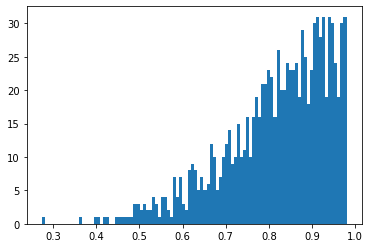

In [196]:
plt.hist(aa,bins=100)
plt.show()

## 실험

In [199]:
import statsmodels.api as sm

def ppm_build(scale = 10.0,epoch =1000):
    scores = []
    drifts = []
    
    #sample_size = false_x.shape[0] * ratio
    #aa = np.random.randint(1,sample_size,epoch)
    #perf = np.random.randint(10,int(base_score[0]*100),epoch)/100
    base = base_score[0]*100
    perf = np.random.normal(loc=base, scale=scale, size=epoch) 
    perf = np.asarray([c if c < base else base*2 - c for c in perf]) /100

    for i in range(epoch):
        #tx = true_x[np.random.choice(true_x.shape[0], sample_size, replace=True)[0:aa[i]],:]
        tx = true_x[np.random.choice(true_x.shape[0], int((perf[i] * false_x.shape[0]) /(1 - perf[i])), replace=True),:]
        fx = false_x #np.random.permutation(false_x)[0:np.random.randint(1,false_x.shape[0],1)[0]]
        #fx = np.random.permutation(false_x)[0:np.random.randint(1,false_x.shape[0],1)[0]]
        #tx = true_x[np.random.choice(true_x.shape[0], fx.shape[0] * ratio, replace=True)[0:np.random.randint(1,fx.shape[0] * ratio,1)[0]],:]
        ffx = np.concatenate((tx,fx))
        np.random.shuffle(ffx)
        tx = ffx[:,0:81]
        ty = ffx[:,81]
        f1 = precision_recall_fscore_support(ty, ML[2010].predict(scaler.transform(tx)),average='binary')
        #x_ref2 = np.random.permutation(x_ref)[0:tx.shape[0]]
        drift = __ks_drift(x_ref,tx)
        scores.append(f1[0])
        drifts.append(drift[:,0])
        print(f"\r{i+1}/{epoch} precision:{f1[0]:.4f} drift:{drift[toplist[0],0]:.4f}", end="", flush=True)

    plt.hist(scores, bins = 100)
    plt.show()

    model = sm.OLS(scores, drifts).fit()
    print('Model R^2:',model.rsquared)
    return model

In [166]:
from sklearn.metrics import r2_score
import math

def test1(model):
    result = {}
    result['precision'] = []
    result['predicted'] = []
    window_size = 5000
    step = 2500
    predicted = 0
    batch = math.ceil((X2.shape[0]-window_size)/step)
    for i in range(batch):
        ux = X2[i*step:i*step+window_size]
        uy = Y2[i*step:i*step+window_size]
        if scaler is not None:
            f1 = precision_recall_fscore_support(uy, ML[2010].predict(scaler.transform(ux)),average='binary')
        else:
            f1 = precision_recall_fscore_support(uy, ML[2010].predict(ux),average='binary')

        drift = __ks_drift(x_ref,ux)
        precision = f1[0]
        predicted1 = model.predict(drift[:,0])[0]
        if abs(predicted1-predicted) > 0.1 and predicted > 0:
            predicted1 = predicted
        result['precision'].append(precision)
        result['predicted'].append(predicted1)
        print(f"\r{i+1}/{batch} precision:{precision:.4f} predicted:{predicted1:.4f}", end="", flush=True)
        predicted = predicted1

    R2 = r2_score(result['precision'],result['predicted'])
    print('')
    print('R2:',R2)
    result_df = pd.DataFrame(result)
    result_df.plot()
    plt.show()
    return R2, result_df

In [202]:
def result_visualization(Exp,scale,df3,result_data):
    for key, value in result_data.items():
        mean = np.mean(value)
        error_rate = 1.96 * np.std(value) / math.sqrt(len(result_data))
        print(f'{key}:{mean:.4f} +- {error_rate:.4f}')

    df4 = pd.DataFrame(df3)
    colums = []
    for trial in result_data['Trial']:
        colums.append(f'predicted {trial}')

    mean_r_2 = np.mean(result_data['R2'])
    df4['max predicted precision'] = df4[colums].max(axis=1)
    df4['mean predicted precision'] = df4[colums].mean(axis=1)
    df4['min predicted precision'] = df4[colums].min(axis=1)

    df4[['real precision','mean predicted precision']].plot(title=f'Exp:{Exp+1}, sampling_scale:{scale}, Mean R^2:{mean_r_2:.4f}', figsize=(8,8))
    plt.fill_between(df4.index, df4['max predicted precision'].values, df4['min predicted precision'].values, alpha=0.40, color='tab:blue')
    plt.show()

Exp 1, Trial 1
2000/2000 precision:0.9717 drift:0.0119

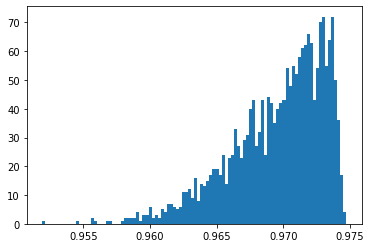

Model R^2: 0.14281817962197796
438/438 precision:0.9040 predicted:0.9589
R2: -0.8797054372363742


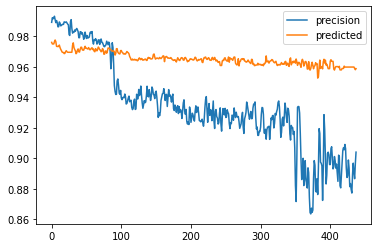

Exp 1, Trial 2
2000/2000 precision:0.9719 drift:0.0115

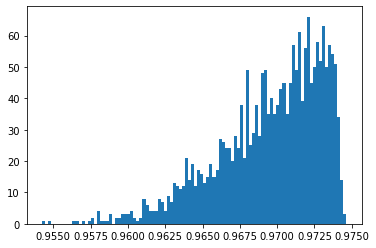

Model R^2: 0.1585005781522405
438/438 precision:0.9040 predicted:0.9591
R2: -0.669550937530027


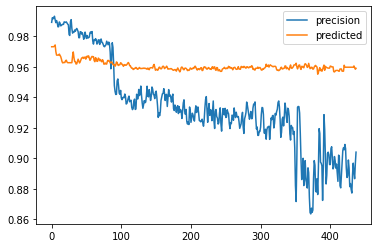

Exp 1, Trial 3
2000/2000 precision:0.9689 drift:0.0210

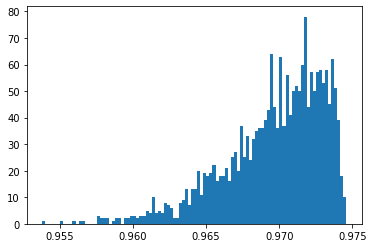

Model R^2: 0.14005247337016236
438/438 precision:0.9040 predicted:0.9704
R2: -1.776450278405377


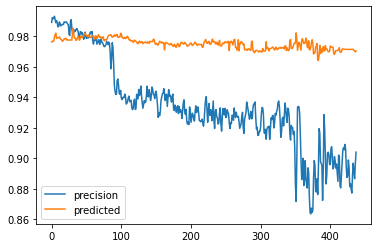

==== Discard this experiment.====
Exp 1, Trial 4
2000/2000 precision:0.9666 drift:0.0345

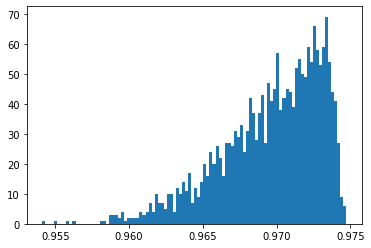

Model R^2: 0.11814527441387324
438/438 precision:0.9040 predicted:0.9560
R2: -0.5252468700065673


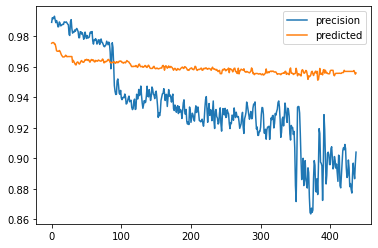

Exp 1, Trial 5
2000/2000 precision:0.9688 drift:0.0305

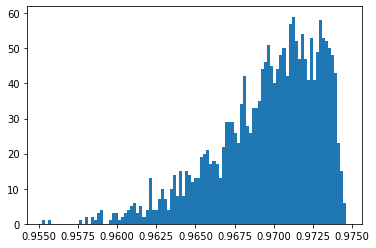

Model R^2: 0.13579566101419926
438/438 precision:0.9040 predicted:0.9639
R2: -1.1192805134716362


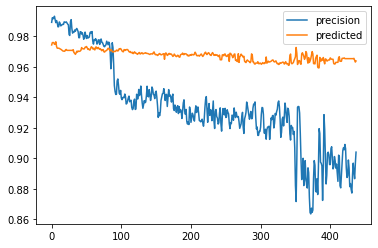

==== Discard this experiment.====
R2:-0.6915 +- 0.2017
Trial:1.3333 +- 1.7286


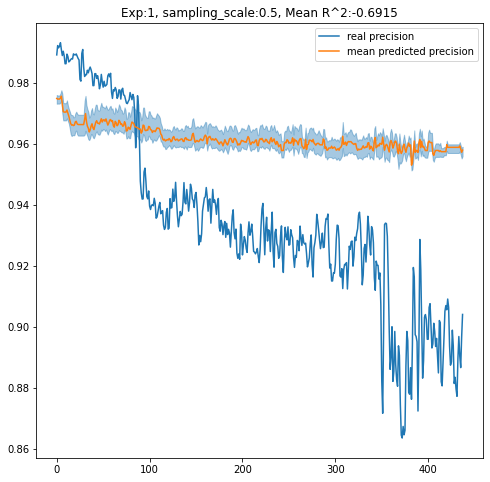

Exp 2, Trial 1
2000/2000 precision:0.9681 drift:0.0159

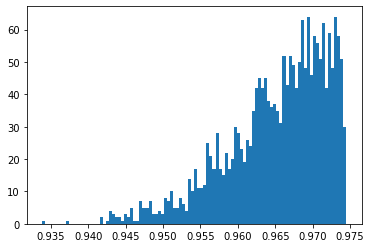

Model R^2: 0.26187250631868264
438/438 precision:0.9040 predicted:0.9444
R2: -0.3063186480140867


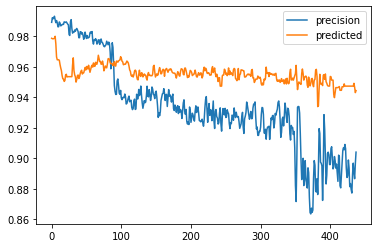

Exp 2, Trial 2
2000/2000 precision:0.9736 drift:0.0159

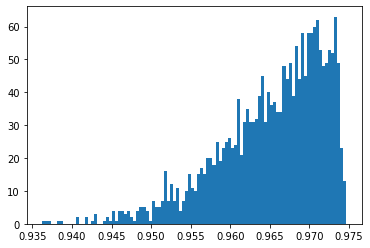

Model R^2: 0.2889141511902865
438/438 precision:0.9040 predicted:0.9553
R2: -0.611044995505929


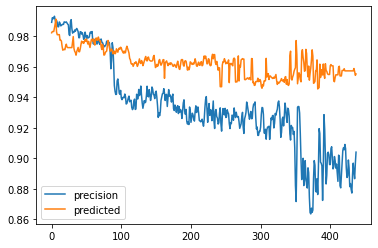

Exp 2, Trial 3
2000/2000 precision:0.9650 drift:0.0373

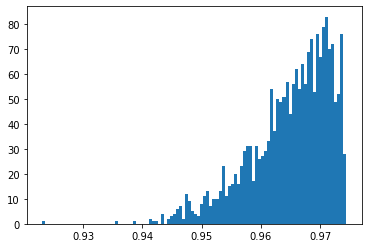

Model R^2: 0.2917333068260144
438/438 precision:0.9040 predicted:0.9367
R2: 0.00505511882659293


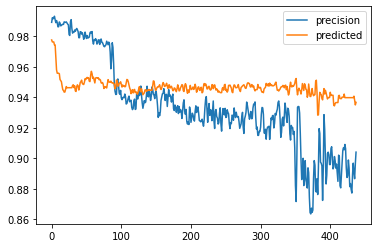

Exp 2, Trial 4
2000/2000 precision:0.9709 drift:-0.0073

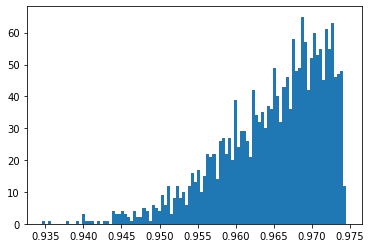

Model R^2: 0.28427006890768813
438/438 precision:0.9040 predicted:0.9299
R2: 0.23623186829981435


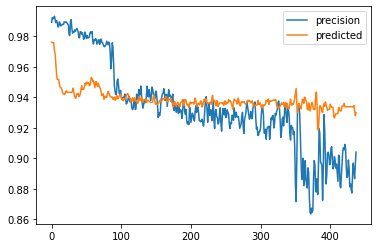

Exp 2, Trial 5
2000/2000 precision:0.9739 drift:0.0167

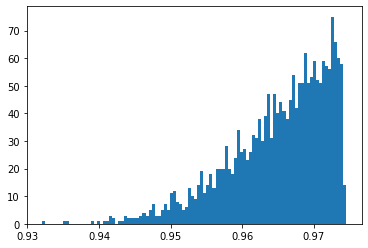

Model R^2: 0.27395143225873064
438/438 precision:0.9040 predicted:0.9402
R2: -0.03523064518713337


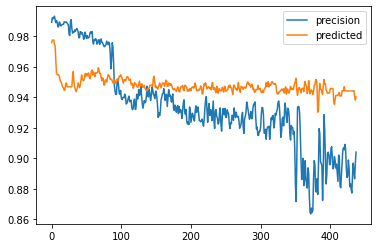

R2:-0.1423 +- 0.4032
Trial:2.0000 +- 1.9600


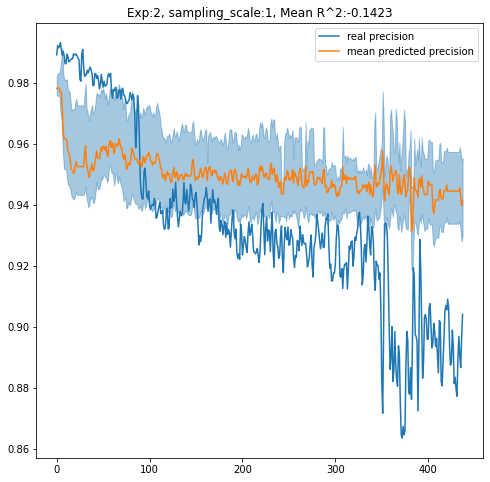

Exp 3, Trial 1
2000/2000 precision:0.9667 drift:0.0104

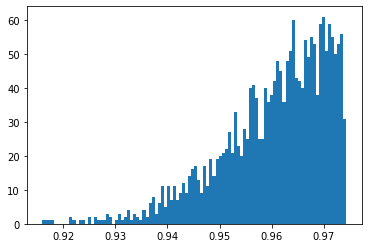

Model R^2: 0.40588367456122787
438/438 precision:0.9040 predicted:0.9213
R2: 0.21140607781064535


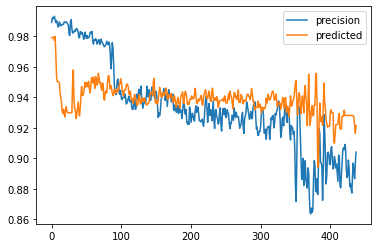

Exp 3, Trial 2
2000/2000 precision:0.9636 drift:-0.0121

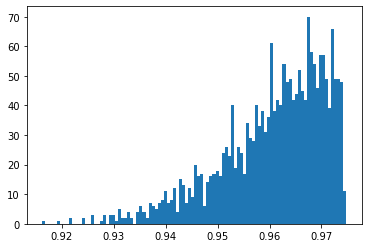

Model R^2: 0.3878060397284335
438/438 precision:0.9040 predicted:0.9320
R2: 0.16812103942825485


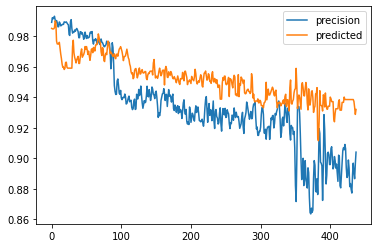

Exp 3, Trial 3
2000/2000 precision:0.9619 drift:0.0338

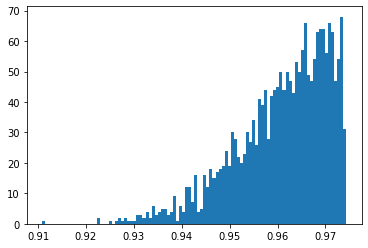

Model R^2: 0.3917776315609466
438/438 precision:0.9040 predicted:0.9267
R2: 0.3197486140937996


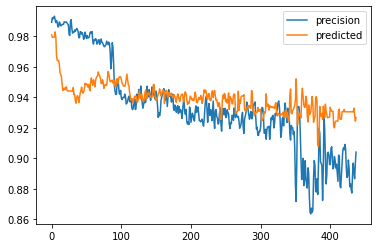

Exp 3, Trial 4
2000/2000 precision:0.9637 drift:0.0394

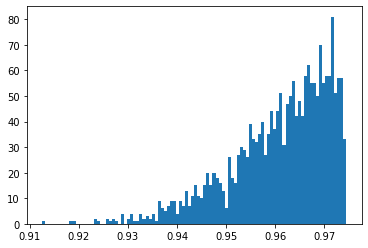

Model R^2: 0.4146274677287324
438/438 precision:0.9040 predicted:0.9128
R2: 0.39567581544110153


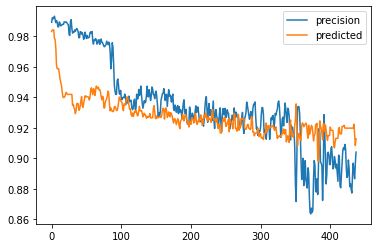

Exp 3, Trial 5
2000/2000 precision:0.9560 drift:0.0559

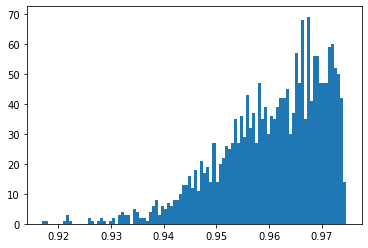

Model R^2: 0.4389617443068522
438/438 precision:0.9040 predicted:0.9023
R2: 0.10758261843015893


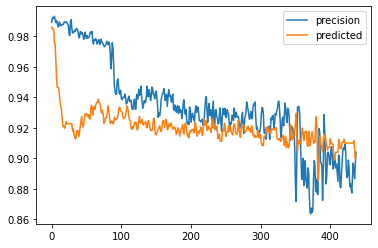

R2:0.2405 +- 0.1442
Trial:2.0000 +- 1.9600


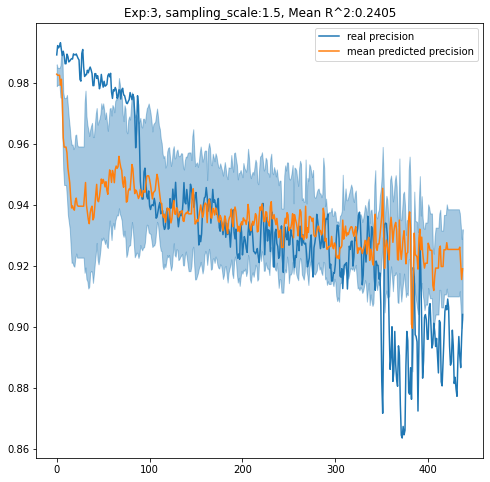

Exp 4, Trial 1
2000/2000 precision:0.9686 drift:0.0174

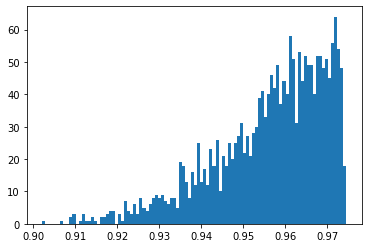

Model R^2: 0.5163940237283977
438/438 precision:0.9040 predicted:0.9344
R2: 0.26842517204173066


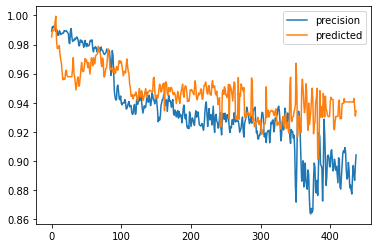

Exp 4, Trial 2
2000/2000 precision:0.9690 drift:0.0259

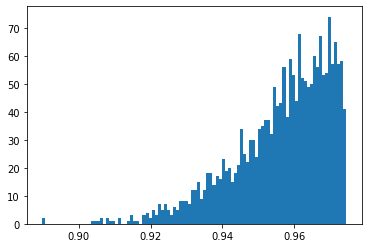

Model R^2: 0.5166191574369299
438/438 precision:0.9040 predicted:0.9377
R2: 0.25460913056423595


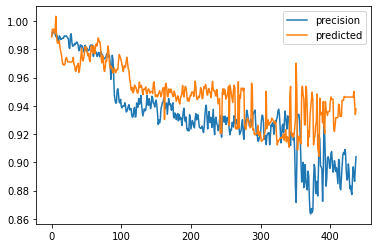

Exp 4, Trial 3
2000/2000 precision:0.9563 drift:0.0207

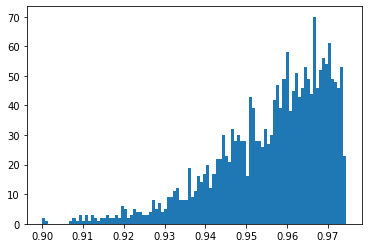

Model R^2: 0.5522444447315943
438/438 precision:0.9040 predicted:0.9067
R2: 0.424302819430174


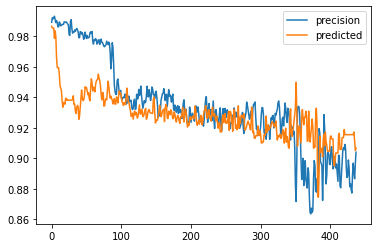

Exp 4, Trial 4
2000/2000 precision:0.9613 drift:0.0221

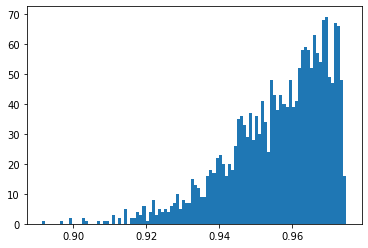

Model R^2: 0.5391445044961249
438/438 precision:0.9040 predicted:0.9231
R2: 0.13855930160832952


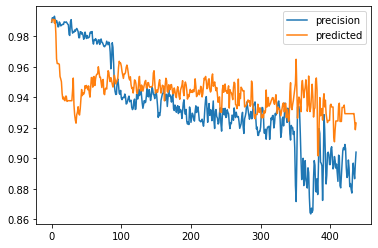

Exp 4, Trial 5
2000/2000 precision:0.9661 drift:0.0127

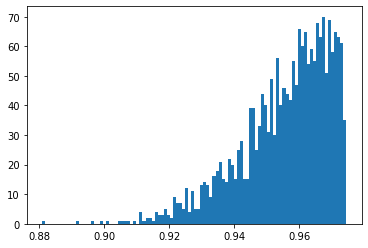

Model R^2: 0.5266414826153116
438/438 precision:0.9040 predicted:0.9123
R2: 0.03576714393987679


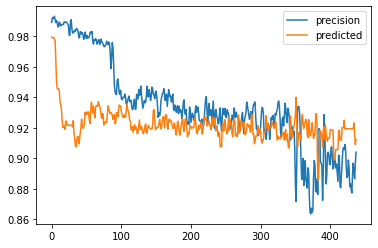

R2:0.2243 +- 0.1815
Trial:2.0000 +- 1.9600


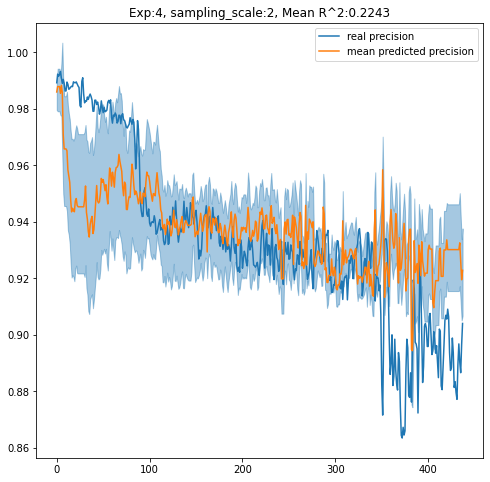

Exp 5, Trial 1
2000/2000 precision:0.9400 drift:0.0136

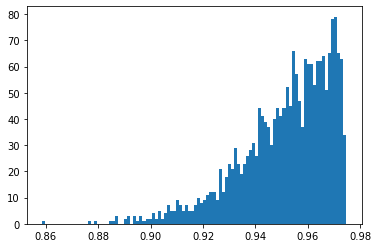

Model R^2: 0.6461411557818368
438/438 precision:0.9040 predicted:0.8886
R2: 0.09200733414632933


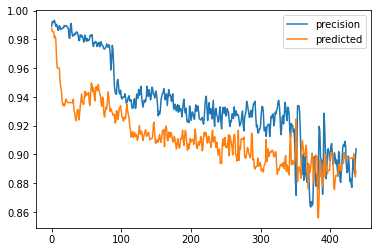

Exp 5, Trial 2
2000/2000 precision:0.9623 drift:0.0182

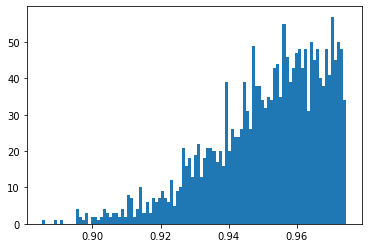

Model R^2: 0.6201458252505319
438/438 precision:0.9040 predicted:0.9173
R2: 0.3823563096998125


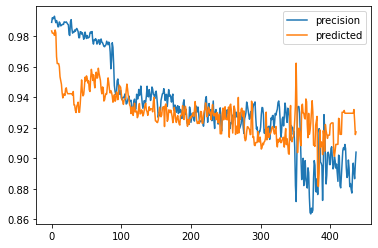

Exp 5, Trial 3
2000/2000 precision:0.9657 drift:0.0115

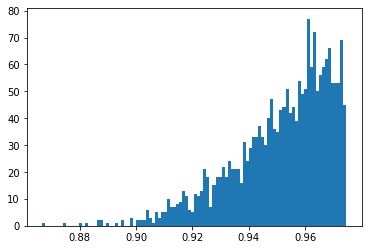

Model R^2: 0.6371600965051448
438/438 precision:0.9040 predicted:0.9013
R2: 0.1423264620765402


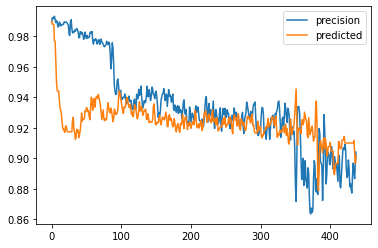

Exp 5, Trial 4
2000/2000 precision:0.9247 drift:0.0614

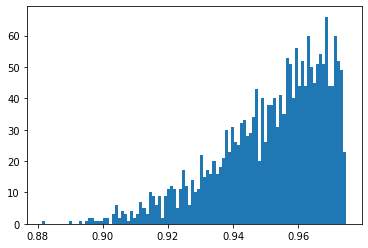

Model R^2: 0.616918796065707
438/438 precision:0.9040 predicted:0.9156
R2: 0.3442578021673306


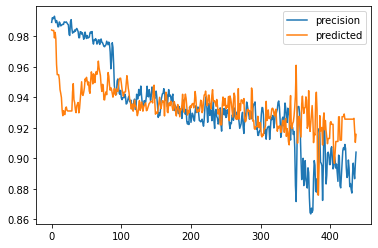

Exp 5, Trial 5
2000/2000 precision:0.9514 drift:0.0252

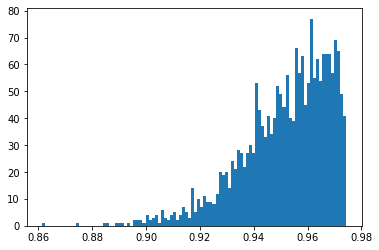

Model R^2: 0.622321043053806
438/438 precision:0.9040 predicted:0.9214
R2: 0.17245043893859158


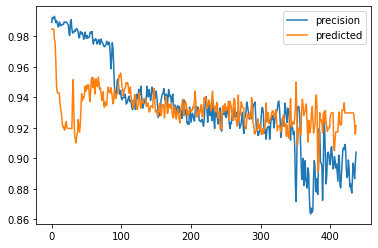

R2:0.2267 +- 0.1595
Trial:2.0000 +- 1.9600


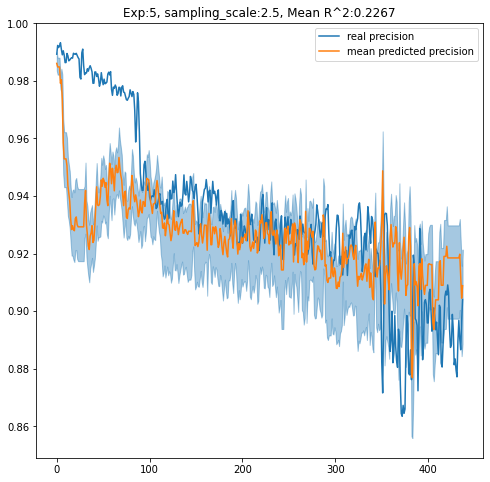

Exp 6, Trial 1
2000/2000 precision:0.9067 drift:0.0724

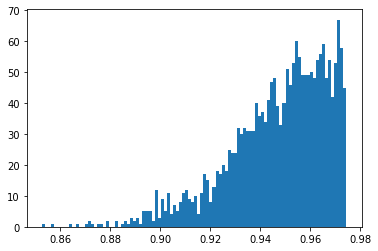

Model R^2: 0.7011553861936368
438/438 precision:0.9040 predicted:0.8917
R2: -0.6632444497138812


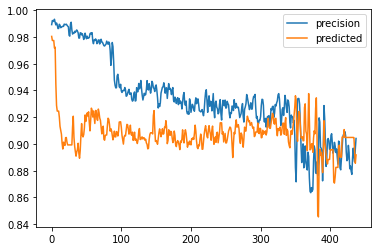

Exp 6, Trial 2
2000/2000 precision:0.9341 drift:0.0213

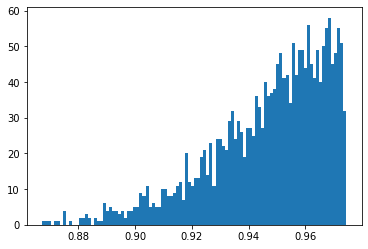

Model R^2: 0.70380508604693
438/438 precision:0.9040 predicted:0.8994
R2: 0.2599644725651392


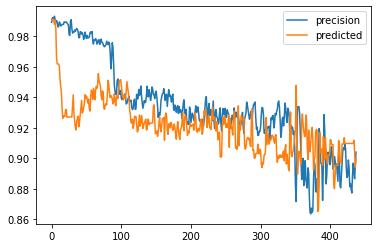

Exp 6, Trial 3
2000/2000 precision:0.9305 drift:0.0189

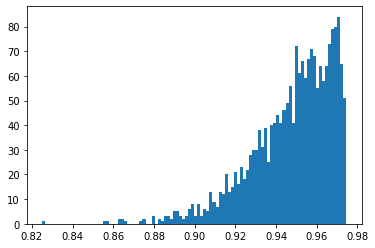

Model R^2: 0.6722380416828921
438/438 precision:0.9040 predicted:0.8936
R2: -0.21356124476042404


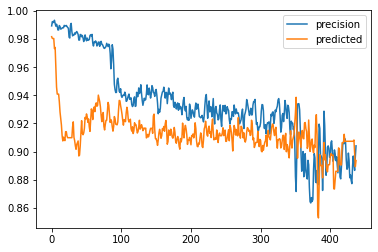

Exp 6, Trial 4
2000/2000 precision:0.9501 drift:0.0204

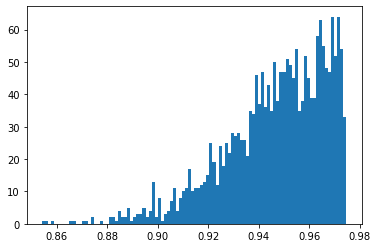

Model R^2: 0.7006360638368092
438/438 precision:0.9040 predicted:0.9087
R2: 0.10315042338598457


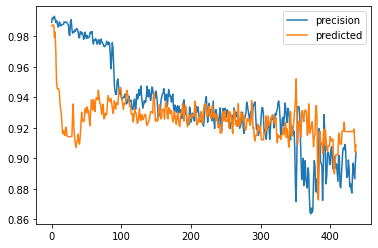

Exp 6, Trial 5
2000/2000 precision:0.9677 drift:0.0303

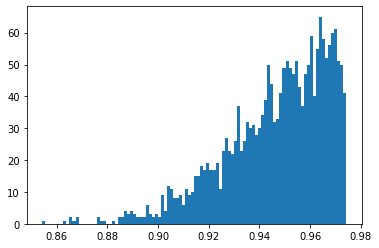

Model R^2: 0.7062626386137553
438/438 precision:0.9040 predicted:0.8948
R2: -0.6139690038387697


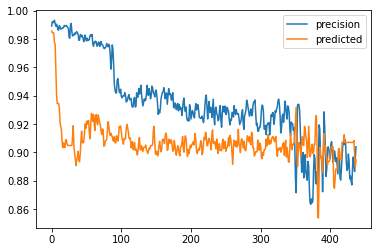

R2:-0.2255 +- 0.5135
Trial:2.0000 +- 1.9600


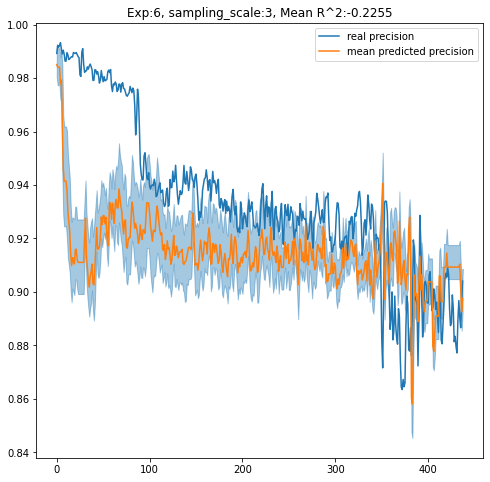

Exp 7, Trial 1
2000/2000 precision:0.9432 drift:0.0411

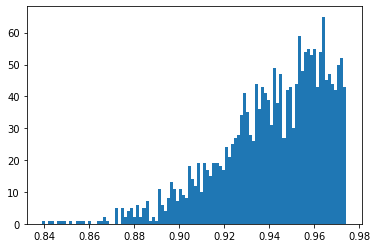

Model R^2: 0.7525091815045102
438/438 precision:0.9040 predicted:0.9203
R2: 0.49816417202293783


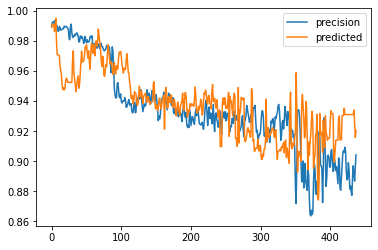

Exp 7, Trial 2
2000/2000 precision:0.9505 drift:-0.0130

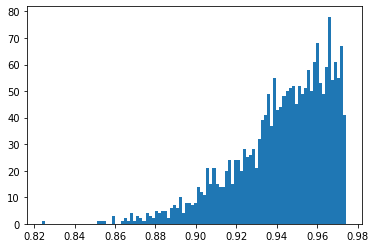

Model R^2: 0.7361451991836134
438/438 precision:0.9040 predicted:0.8970
R2: -0.34732564343186145


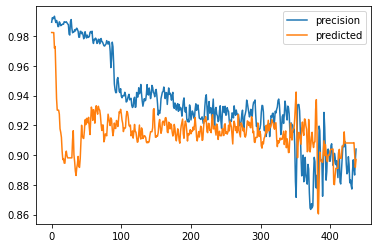

Exp 7, Trial 3
2000/2000 precision:0.9629 drift:0.0210

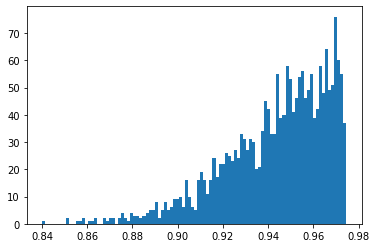

Model R^2: 0.729253717527992
438/438 precision:0.9040 predicted:0.9085
R2: 0.08679899177566408


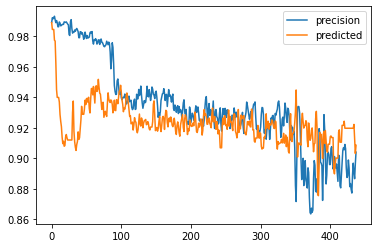

Exp 7, Trial 4
2000/2000 precision:0.9085 drift:0.0690

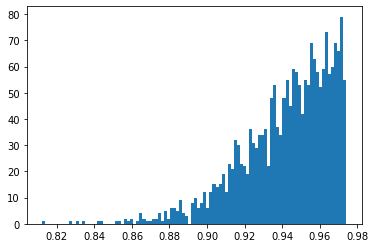

Model R^2: 0.7643423486430123
438/438 precision:0.9040 predicted:0.8985
R2: 0.23140466478009447


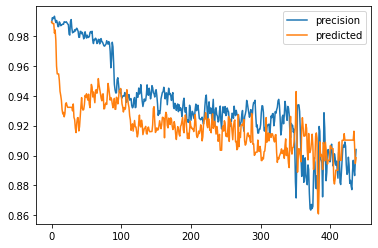

Exp 7, Trial 5
2000/2000 precision:0.9494 drift:0.0132

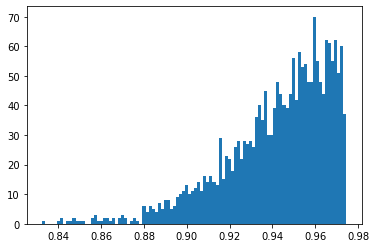

Model R^2: 0.7687162720861181
438/438 precision:0.9040 predicted:0.9035
R2: -0.09683789283923705


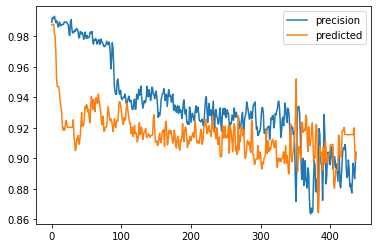

R2:0.0744 +- 0.3976
Trial:2.0000 +- 1.9600


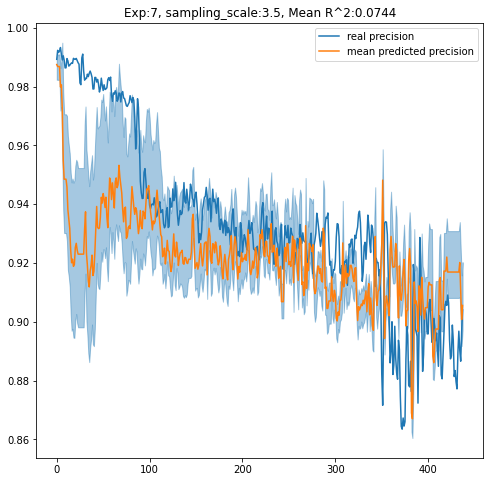

Exp 8, Trial 1
2000/2000 precision:0.9652 drift:0.0153

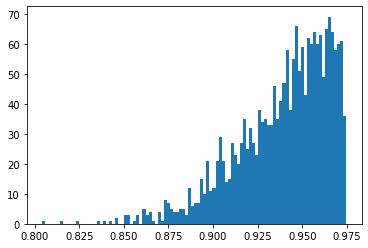

Model R^2: 0.7748300439064568
438/438 precision:0.9040 predicted:0.8871
R2: -0.61906837081808


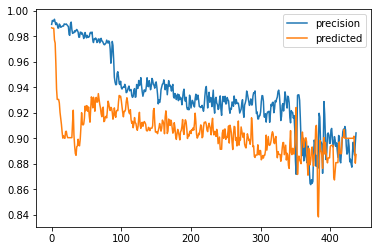

Exp 8, Trial 2
2000/2000 precision:0.9588 drift:0.0131

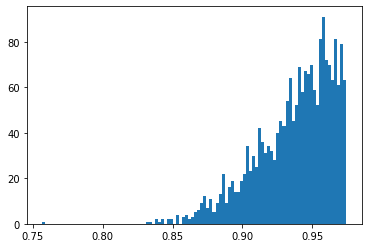

Model R^2: 0.8027559303880984
438/438 precision:0.9040 predicted:0.8744
R2: -0.5542806569262955


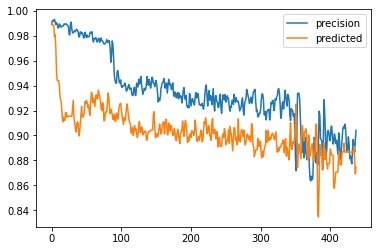

Exp 8, Trial 3
2000/2000 precision:0.9466 drift:0.0366

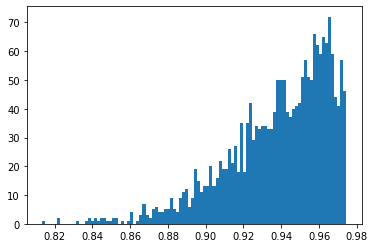

Model R^2: 0.7945562402994002
438/438 precision:0.9040 predicted:0.8842
R2: -0.49266424153502575


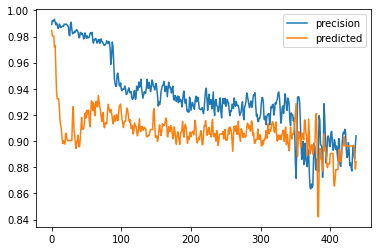

Exp 8, Trial 4
2000/2000 precision:0.9571 drift:0.0218

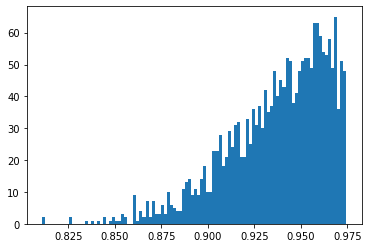

Model R^2: 0.7845830659906822
438/438 precision:0.9040 predicted:0.8925
R2: -0.27057786136703177


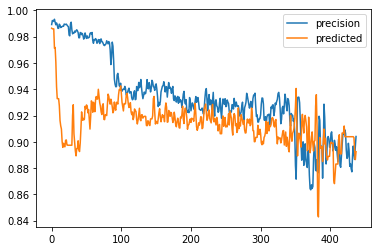

Exp 8, Trial 5
2000/2000 precision:0.9558 drift:0.0231

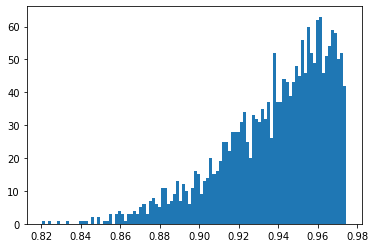

Model R^2: 0.7861171863357921
438/438 precision:0.9040 predicted:0.8816
R2: 0.06663085394947355


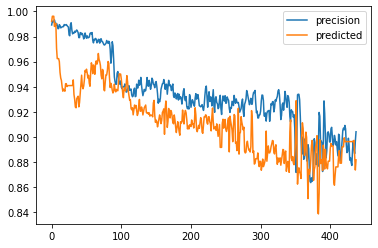

R2:-0.3740 +- 0.3459
Trial:2.0000 +- 1.9600


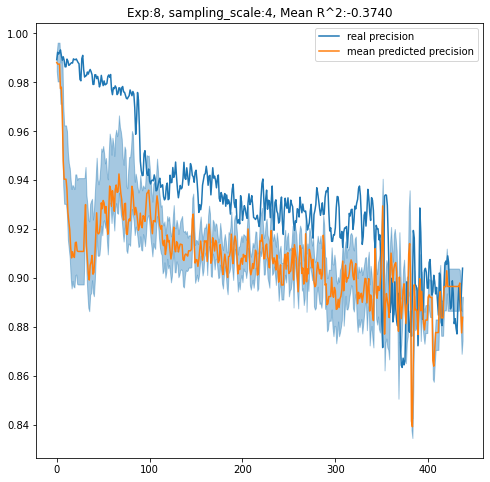

Exp 9, Trial 1
2000/2000 precision:0.9606 drift:0.0301

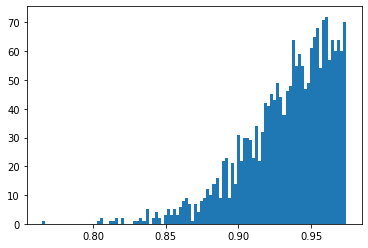

Model R^2: 0.831178821036386
438/438 precision:0.9040 predicted:0.8821
R2: -0.24542338152355825


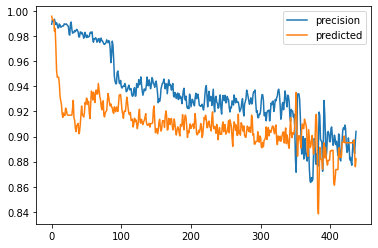

Exp 9, Trial 2
2000/2000 precision:0.9332 drift:0.0448

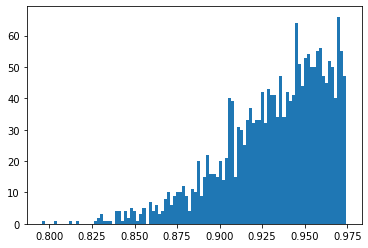

Model R^2: 0.8200178961345397
438/438 precision:0.9040 predicted:0.8966
R2: -0.16037896614142344


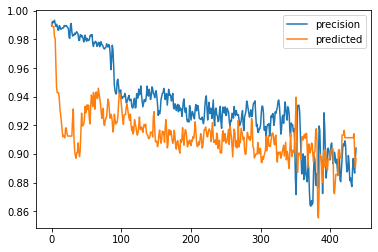

Exp 9, Trial 3
2000/2000 precision:0.9193 drift:0.0605

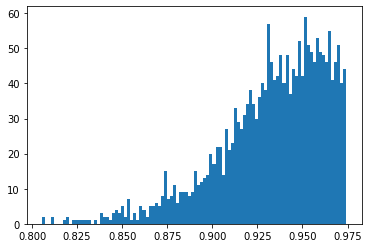

Model R^2: 0.8214662248026353
438/438 precision:0.9040 predicted:0.8750
R2: -0.7636763751861433


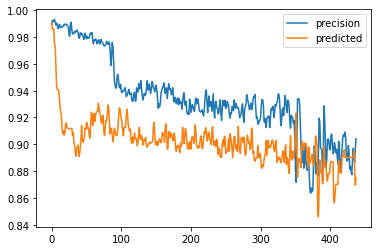

Exp 9, Trial 4
2000/2000 precision:0.9684 drift:0.0144

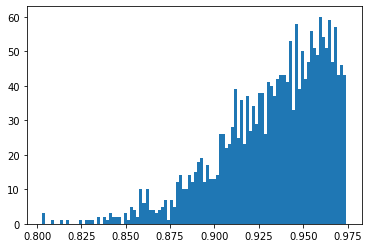

Model R^2: 0.8161066987317636
438/438 precision:0.9040 predicted:0.9145
R2: 0.43136094154074967


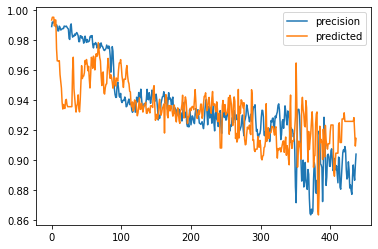

Exp 9, Trial 5
2000/2000 precision:0.9650 drift:0.0168

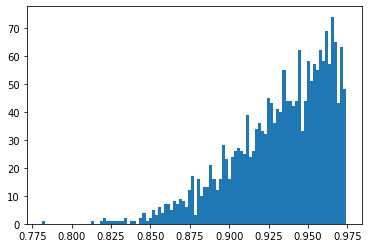

Model R^2: 0.8228136176057255
438/438 precision:0.9040 predicted:0.8938
R2: -0.10362537941491401


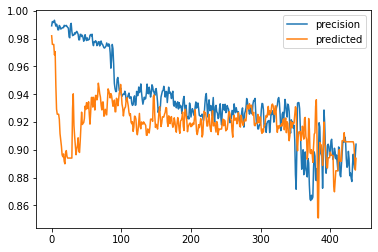

R2:-0.1683 +- 0.5275
Trial:2.0000 +- 1.9600


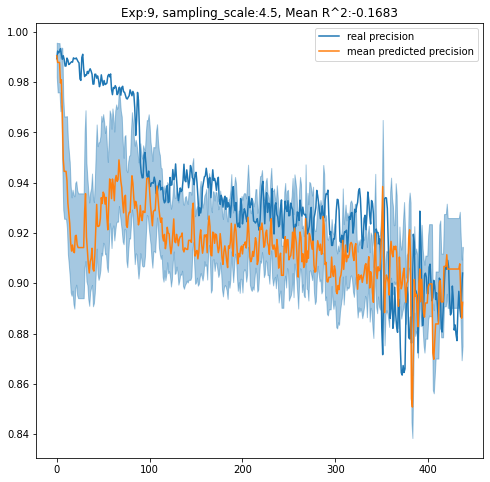

Exp 10, Trial 1
2000/2000 precision:0.9704 drift:0.0202

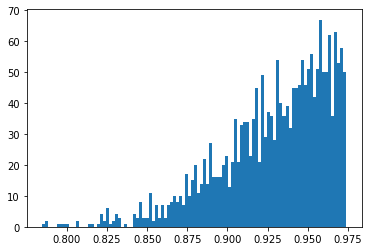

Model R^2: 0.8509055564097803
438/438 precision:0.9040 predicted:0.8725
R2: -2.3147444565263533


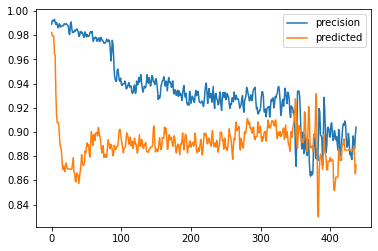

==== Discard this experiment.====
Exp 10, Trial 2
2000/2000 precision:0.8250 drift:0.0854

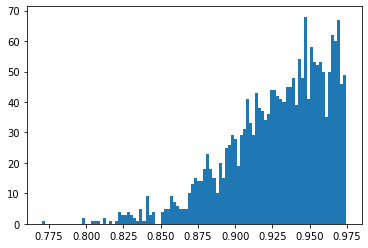

Model R^2: 0.8360623860487506
438/438 precision:0.9040 predicted:0.8873
R2: -0.33598094708920323


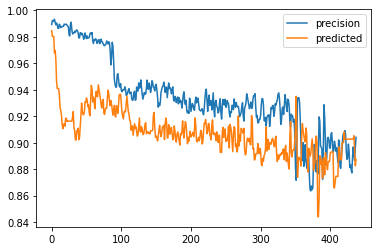

Exp 10, Trial 3
2000/2000 precision:0.8557 drift:0.0736

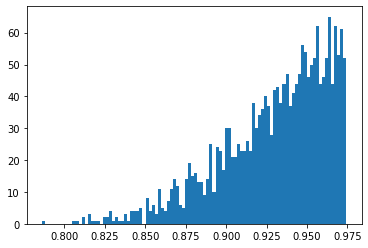

Model R^2: 0.8347692587524328
438/438 precision:0.9040 predicted:0.9121
R2: -0.000651729329874895


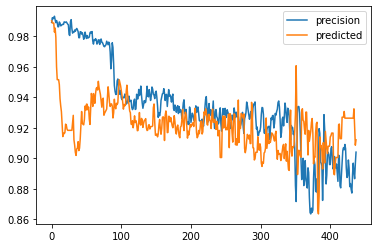

Exp 10, Trial 4
2000/2000 precision:0.9138 drift:0.0589

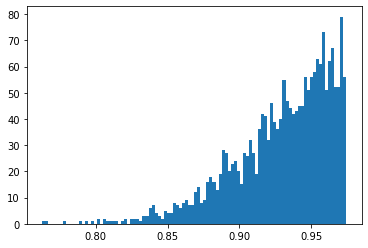

Model R^2: 0.8403557975377678
438/438 precision:0.9040 predicted:0.8860
R2: -0.577591712926135


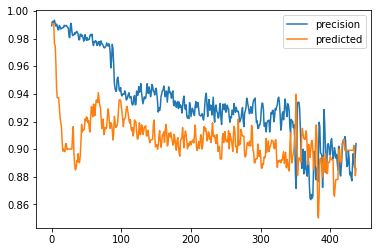

Exp 10, Trial 5
2000/2000 precision:0.9128 drift:0.0609

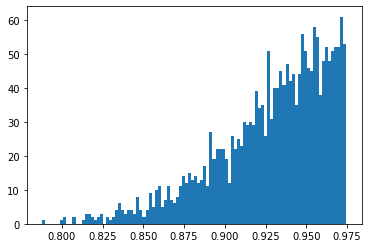

Model R^2: 0.8527997606053124
438/438 precision:0.9040 predicted:0.8912
R2: -0.3620135002469198


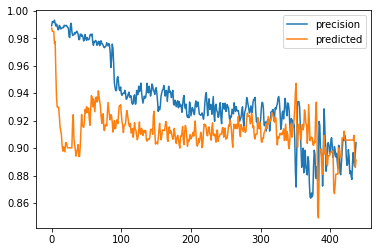

R2:-0.3191 +- 0.2860
Trial:2.5000 +- 1.5495


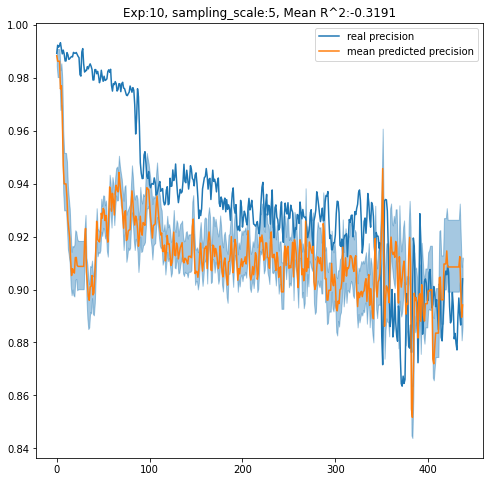

In [205]:
seed_everything()

scales = [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]
for Exp in range(len(scales)):
    df3 = {}
    result_data = {}
    result_data['R2'] = []
    result_data['Trial'] = []
    #result_dfs = []
    experimant_count = 5
    scale = scales[Exp]
    for trial in range(experimant_count):
        print(f'Exp {Exp+1}, Trial {trial+1}')
        model = ppm_build(scale = scale,epoch =2000)
        R2, result_df = test1(model)
        if R2 > -1.0:
            result_data['R2'].append(R2)
            result_data['Trial'].append(trial)
            df3['real precision'] = result_df['precision'].values
            df3[f'predicted {trial}'] = result_df['predicted'].values
        else:
            print('==== Discard this experiment.====')

    result_visualization(Exp,scale,df3,result_data)

In [136]:
#R2:-1.5451 +- 0.8283

In [ ]:
# -1.2306324299418536

# 8. Credit card transactions 실험


https://www.kaggle.com/datasets/ealtman2019/credit-card-transactions

https://www.kaggle.com/code/vadimabronin/notebookd76fc110c7

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 66 bytes


## 데이터 구축

In [ ]:
!kaggle datasets download "ealtman2019/credit-card-transactions"

 99% 261M/263M [00:02<00:00, 102MB/s]
100% 263M/263M [00:02<00:00, 129MB/s]


In [ ]:
!unzip credit-card-transactions.zip

Archive:  credit-card-transactions.zip
  inflating: User0_credit_card_transactions.csv  
  inflating: credit_card_transactions-ibm_v2.csv  
  inflating: sd254_cards.csv         
  inflating: sd254_users.csv         


In [ ]:
df = pd.read_csv("credit_card_transactions-ibm_v2.csv")

In [ ]:
df['Year'].value_counts()

2019    1723938
2017    1723360
2018    1721615
2016    1708924
2015    1701371
2014    1672343
2013    1650917
2012    1610829
2011    1570551
2010    1491225
2009    1355434
2008    1223460
2007    1064483
2006     908793
2005     746653
2004     597003
2003     466408
2002     350732
2020     336500
2001     257998
2000     177729
1999     118250
1998      78345
1997      49753
1996      29945
1995      20928
1994      14316
1993       8378
1992       5134
1991       1585
Name: Year, dtype: int64

### 데이터 정체 (1/30 로 축소)

In [ ]:
import numpy as np 
import pandas as pd 
import os
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

seed_everything()

In [ ]:
df['Is Fraud?']=df['Is Fraud?'].replace({'No':0,'Yes':1}) 

In [ ]:
df1 = df[df['Is Fraud?']==1]
df2 = df[df['Is Fraud?']==0]
df3 = df2.sample(int(df2.shape[0]/30))
df4 = pd.concat([df1,df3])

print("Compression rate:",df4.shape[0] / df.shape[0] )

df = df4

Compression rate: 0.034512832709364456


### 기타 등등 전처리

In [ ]:
df['Errors?']=df['Errors?'].fillna('NAN')
df['Errors?']=df['Errors?'].apply(lambda value:value=='NAN')
df['Errors?'].value_counts()

True     827624
False     14037
Name: Errors?, dtype: int64

In [ ]:
df['Use Chip'].unique()
df['is online']=df['Use Chip'].apply(lambda value:value=='Online Transaction')

In [ ]:

from sklearn.preprocessing import LabelEncoder
df['Use Chip']=df['Use Chip'].replace({'Swipe Transaction':0, 'Online Transaction':1, 'Chip Transaction':2})
df['Zip'] = df['Zip'].fillna(df['Zip'].mean())  
df['Amount'] = df['Amount'].apply(lambda value: float(value.split("$")[1]))
df['Hour'] = df['Time'].apply(lambda value: int(value.split(":")[0]))
df['Minutes'] = df['Time'].apply(lambda value: int(value.split(":")[1]))
df.drop(['Time'], axis=1, inplace=True)     
df['Merchant State']=df['Merchant State'].fillna('NAN')    
df['Merchant City']=df['Merchant City'].fillna('NAN') 
df['is vozmes']=df['Amount'].apply(lambda value: value<0)  
df['abs_amount']=df['Amount'].apply(lambda value: abs(value))

In [ ]:
#encoding categorial features
le=LabelEncoder() 
df['Merchant State']=le.fit_transform(df['Merchant State'])
le=LabelEncoder()
df['Merchant City']=le.fit_transform(df['Merchant City'])
le=LabelEncoder()
df['Errors?']=le.fit_transform(df['Errors?'])
le=LabelEncoder()
df['is online']=le.fit_transform(df['is online'])
le=LabelEncoder()
df['is vozmes']=le.fit_transform(df['is vozmes'])

In [ ]:
df = df.sort_values(['Year','Month','Day'])

In [ ]:
df.Year.value_counts()

2016    60726
2018    60155
2015    59749
2019    59311
2017    57298
2014    56896
2013    56777
2012    55201
2010    53148
2011    52492
2009    46303
2008    44533
2007    37301
2006    31605
2005    25058
2004    20495
2003    15674
2002    11824
2020    11342
2001     9012
2000     6057
1999     3811
1998     2641
1997     1679
1996      920
1995      683
1994      461
1993      285
1992      159
1991       65
Name: Year, dtype: int64

### dataset 만들기

In [ ]:
drop_columns = ['Is Fraud?','Zip','Year','Month','Day','Minutes','User','Errors?','Merchant Name','Merchant City','Merchant State']
X = df[df['Year']==2007].drop(drop_columns,axis=1)
y = df[df['Year']==2007]['Is Fraud?']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37301 entries, 19831724 to 16154702
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Card        37301 non-null  int64  
 1   Amount      37301 non-null  float64
 2   Use Chip    37301 non-null  int64  
 3   MCC         37301 non-null  int64  
 4   is online   37301 non-null  int64  
 5   Hour        37301 non-null  int64  
 6   is vozmes   37301 non-null  int64  
 7   abs_amount  37301 non-null  float64
dtypes: float64(2), int64(6)
memory usage: 2.6 MB


이러한 데이터는 시계열 데이터는 아니지만, 시간적 특성을 포함하는 데이터로서
testset을 나눌때 shuffle 없이 7:3으로 나눈다.

In [ ]:
X.shape

(37301, 8)

In [ ]:
offset = int(y.values.shape[0] * 0.7)
y_ref = y.values[0:offset]
x_ref = X.values[0:offset]
y_inf = y.values[offset:]
x_inf = X.values[offset:]

In [ ]:
x_ref.shape[0] + x_inf.shape[0]

37301

## 예측모델 구축

### Catboost 모델 

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.3 MB/s 


### Credit card fraud transaction detect model build

In [ ]:
#cat boost classifier

from catboost import CatBoostClassifier

seed_everything()

cat = CatBoostClassifier()
cat.fit(x_ref, y_ref,plot=False) 
y_pred=cat.predict(x_inf)
print(classification_report(y_inf, y_pred))  

Learning rate set to 0.041487
0:	learn: 0.6216151	total: 53.9ms	remaining: 53.9s
1:	learn: 0.5551103	total: 61.6ms	remaining: 30.7s
2:	learn: 0.4986417	total: 68.9ms	remaining: 22.9s
3:	learn: 0.4565464	total: 76.6ms	remaining: 19.1s
4:	learn: 0.4136850	total: 88.1ms	remaining: 17.5s
5:	learn: 0.3820252	total: 94.2ms	remaining: 15.6s
6:	learn: 0.3484819	total: 100ms	remaining: 14.2s
7:	learn: 0.3184745	total: 110ms	remaining: 13.6s
8:	learn: 0.2939070	total: 122ms	remaining: 13.4s
9:	learn: 0.2715727	total: 136ms	remaining: 13.5s
10:	learn: 0.2529872	total: 146ms	remaining: 13.1s
11:	learn: 0.2348952	total: 154ms	remaining: 12.7s
12:	learn: 0.2241845	total: 165ms	remaining: 12.5s
13:	learn: 0.2115322	total: 179ms	remaining: 12.6s
14:	learn: 0.2029825	total: 188ms	remaining: 12.3s
15:	learn: 0.1922771	total: 214ms	remaining: 13.1s
16:	learn: 0.1826835	total: 221ms	remaining: 12.8s
17:	learn: 0.1743241	total: 228ms	remaining: 12.4s
18:	learn: 0.1673404	total: 236ms	remaining: 12.2s
19:	l

In [ ]:
from sklearn.metrics import f1_score,roc_auc_score
print(f1_score(y_inf, y_pred)) 
print(roc_auc_score(y_inf, y_pred))

0.6974789915966385
0.7759890977827133


## Credit card fraud transaction detect model 성능 예측 실험

In [ ]:
df1 = df[df['Year'] >= 2008]
df2 = df1[df1['Year'] <= 2009]

X_test2 = df2[df2['Year'] >= 2008].drop(drop_columns,axis=1)
y_test2 = df2[df2['Year'] >= 2008]['Is Fraud?']

In [ ]:
y_pred=cat.predict(x_inf)
print(classification_report(y_inf, y_pred))  

base_score = precision_recall_fscore_support(y_inf, y_pred,average='binary')

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     10294
           1       0.94      0.56      0.70       897

    accuracy                           0.96     11191
   macro avg       0.95      0.78      0.84     11191
weighted avg       0.96      0.96      0.96     11191



In [ ]:
base_score

(0.9378531073446328, 0.5551839464882943, 0.6974789915966385, None)

In [ ]:

print("trainset:",X.shape)
print("online dataset:",X_test2.shape)

trainset: (37301, 8)
online dataset: (90836, 8)


In [ ]:
COLUMNS = X.columns

In [ ]:
COLUMNS

Index(['Card', 'Amount', 'Use Chip', 'MCC', 'is online', 'Hour', 'is vozmes',
       'abs_amount'],
      dtype='object')

In [ ]:
importances = cat.feature_importances_

### Error chart

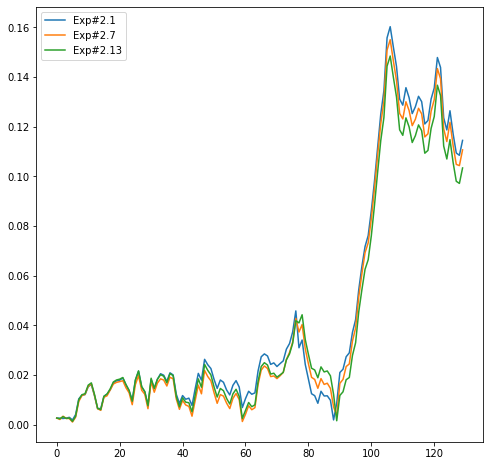

In [ ]:
error_df = pd.DataFrame(erdic)
error_df[['Exp#2.1','Exp#2.7','Exp#2.13']].plot(legend=True, figsize=(8,8))
#error_df.plot(legend=True, figsize=(20,5))